In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import datetime

In [0]:
# acquire data
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Input/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Input/test.csv')
all_df = train_df.append(test_df)

In [0]:
all_df.reset_index(inplace=True ,drop=True)

In [0]:
all_df.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0.0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0.0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0.0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0.0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0.0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


#### 觀察資料的統計值 for train data

In [0]:
train_df.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,4.149114e+00,1.337572e-02,4.749410e+00,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,2.394259e+00,1.148774e-01,1.111927e+00,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


*   count：指定字段的非空總數
*   unique：該自段中保存的值類型數量，比如性别列保存了男、女兩種值，則unique值為2
*   top：數量最多的值
*   freq：數量最多的值的總數

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null object
etymd        1521787 non-null int64
flbmk        1509206 non-null object
flg_3dsmk    1509206 non-null object
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null object
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null object
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(16), object(5)
memory us

In [0]:
train_df.groupby('fraud_ind').sum()

,acqic,bacno,cano,conam,contp,csmcu,etymd,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
fraud_ind,,,,,,,,,,,,,,,,,
0,9042587114,123250593278,163482476248,9.818490e+08,7248321,80778143,6201258,7125821,75449,68109434,2.200713e+11,447178405,83981036021,7149439802,144147015,26497,1454724032904
1,100313285,1673308849,2266064645,1.449818e+07,100949,1144577,112810,101769,74,869085,2.589286e+09,6023373,1071978969,86852115,1413678,11327,23123718525


In [0]:
train_df.describe(include=['object'])

,ecfg,flbmk,flg_3dsmk,insfg,ovrlt
count,1521787,1509206,1509206,1521787,1521787
unique,2,2,2,2,2
top,N,N,N,N,N
freq,1134512,1504133,1444867,1479475,1501536


資料視覺化

In [0]:
num_features = train_df.select_dtypes(include=['int64','float64'])
print(num_features.columns)
categorical_features = train_df.select_dtypes(include='object')
print(categorical_features.columns)

Index(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'etymd',
       'fraud_ind', 'hcefg', 'iterm', 'locdt', 'loctm', 'mcc', 'mchno',
       'scity', 'stocn', 'stscd', 'txkey'],
      dtype='object')
Index(['ecfg', 'flbmk', 'flg_3dsmk', 'insfg', 'ovrlt'], dtype='object')


In [0]:
for i in categorical_features.columns:
    a = pd.crosstab(train_df['fraud_ind'] ,[train_df[i]])
    print(a)

# for i in range(0,len(categorical_features.columns)):
#     a = pd.crosstab(train_df['fraud_ind'] ,train_df[categorical_features.columns[i]])
#     print(a)
# pd.crosstab(train_df['fraud_ind'] ,train_df['ovrlt'])

ecfg             N       Y
fraud_ind                 
0          1131650  369782
1             2862   17493
flbmk            N     Y
fraud_ind               
0          1484060  4986
1            20073    87
flg_3dsmk        N      Y
fraud_ind                
0          1424807  64239
1            20060    100
insfg            N      Y
fraud_ind                
0          1459157  42275
1            20318     37
ovrlt            N      Y
fraud_ind                
0          1481816  19616
1            19720    635


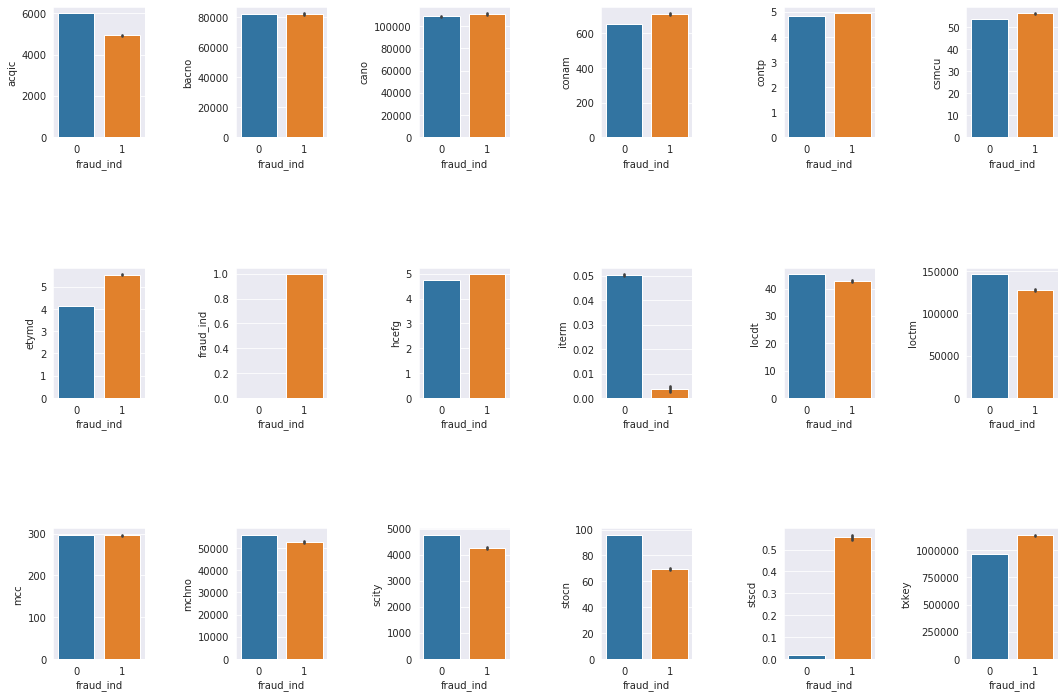

In [0]:
%matplotlib inline

## Box-Plot
# 橫縱座標都有標線，組成一個一個格子，背景稍微深色
sns.set_style('darkgrid')
# 有 3*6 張子圖
fig,axes=plt.subplots(3 ,6)
# 子圖的上下左右間隔
plt.subplots_adjust(wspace =1 ,hspace =1) 
# 設定子圖的大小
fig.set_size_inches(18 ,12)

for i in range(0 ,len(num_features.columns)):
    if 0<=i<6:
        sns.barplot(x='fraud_ind' ,y=num_features.columns[i] ,data=num_features ,ax=axes[0,i])
    elif 6<=i<12:
        sns.barplot(x='fraud_ind' ,y=num_features.columns[i] ,data=num_features ,ax=axes[1,i-6])
    else:
        sns.barplot(x='fraud_ind' ,y=num_features.columns[i] ,data=num_features ,ax=axes[2,i-12])

# sns.barplot(x='fraud_ind' ,y='acqic' ,data=num_features ,ax=axes[1])

# 儲存圖檔
plt.savefig('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/num_features.jpg' ,dpi=500) 

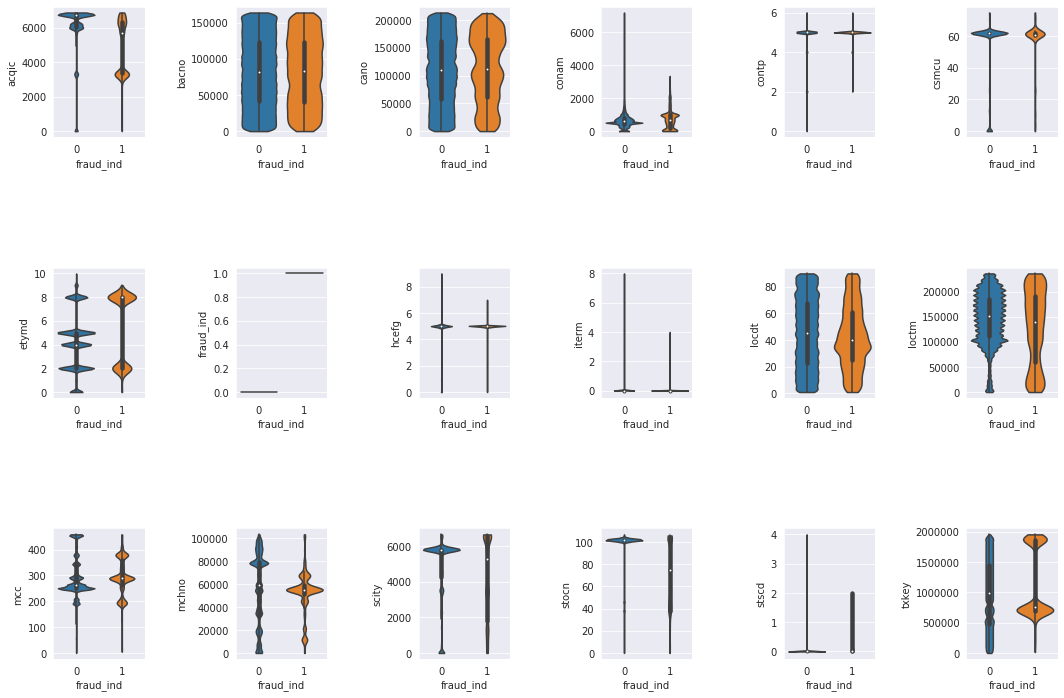

In [0]:
#%matplotlib notebook  #可以手動儲存、調整大小、zoon in/out
%matplotlib inline

## 提琴圖
# 橫縱座標都有標線，組成一個一個格子，背景稍微深色
sns.set_style('darkgrid')
# 有 3*6 張子圖
fig,axes=plt.subplots(3,6)
# 子圖的上下左右間隔
plt.subplots_adjust(wspace =1 ,hspace =1) 
# 設定子圖的大小
fig.set_size_inches(18 ,12)

for i in range(0 ,len(num_features.columns)):
    if 0<=i<6:
        sns.violinplot(x='fraud_ind' ,y=num_features.columns[i] ,data=num_features ,cut=0 ,split=True ,ax=axes[0,i])
    elif 6<=i<12:
        sns.violinplot(x='fraud_ind' ,y=num_features.columns[i] ,data=num_features ,cut=0 ,split=True ,ax=axes[1,i-6])
    else:
        sns.violinplot(x='fraud_ind' ,y=num_features.columns[i] ,data=num_features ,cut=0 ,split=True ,ax=axes[2,i-12])

# 儲存圖檔
plt.savefig('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/num_features_Vcut.jpg',dpi=500)

In [0]:
pd.crosstab(num_features['etymd'] ,num_features['fraud_ind'] ,margins=True ,margins_name='Total')
# 'contp' ,'etymd' ,'hcefg' ,'stscd' 分類，類別數10以下
# num_features.groupby('etymd')['fraud_ind'].count() 

fraud_ind,0,1,Total
etymd,,,
0,129839,183,130022
1,10316,23,10339
2,369865,7804,377669
3,2333,17,2350
4,320327,175,320502
5,404408,203,404611
6,1833,145,1978
7,161,67,228
8,232427,11568,243995


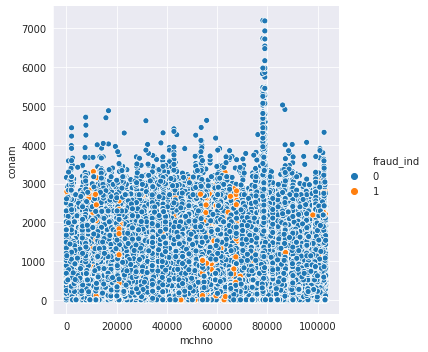

In [0]:
# 繪製變數間的關係圖
sns.relplot(x='mchno' ,y='conam' ,hue='fraud_ind' ,data=num_features)
# sns.relplot(x='mchno' ,y='conam' ,style='smoker' ,data=num_features)

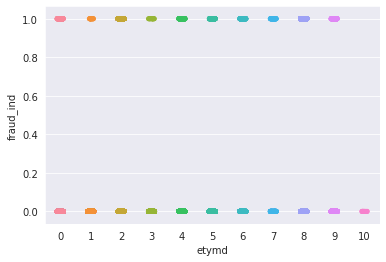

In [0]:
# jitter是資料點可以稍微偏離一些，這樣資料量大的時候可以避免畫的點全部集中在一起看不清
# 適合 X 和 Y 都是連續型變數
sns.stripplot(x='etymd' ,y='fraud_ind' ,data=num_features ,jitter=True)

In [0]:
# Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot
# sns.pairplot(num_features, hue='fraud_ind', size=2.5);

Dammy Variable

* 數值型態變數：分組，以訓練集判斷分組的方式

In [0]:
# 交易序號：不需分類，它是KEY
all_df['txkey_g']=np.nan

for i in range (0,len(all_df['txkey'])):
    if all_df['txkey'][i]<500000:
        all_df['txkey_g'][i]='0'
    elif 500000<=all_df['txkey'][i]<1000000:
        all_df['txkey_g'][i]='1'
    elif 1000000<=all_df['txkey'][i]<1500000:
        all_df['txkey_g'][i]='2'
    else:
        all_df['txkey_g'][i]='3'

#all_df.groupby('txkey_g')['fraud_ind'].count()
pd.crosstab(all_df.txkey_g, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
txkey_g,,,
0.0,393051,448,393499
1.0,375850,11964,387814
2.0,388460,558,389018
3.0,344071,7385,351456
Total,1501432,20355,1521787


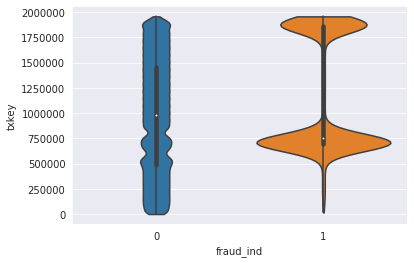

In [0]:
# 橫縱座標都有標線，組成一個一個格子，背景稍微深色
sns.set_style('darkgrid')
## 參考：https://www.itread01.com/content/1544559507.html

# y軸的區間
#plt.ylim((0, 2500))
sns.violinplot(x='fraud_ind' ,y='txkey' ,cut=0 ,data=train_df)

In [0]:
#狀態碼：類別型態
#all_df.groupby('stscd')['fraud_ind'].count()
pd.crosstab(all_df.stscd, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
stscd,,,
0,1488066,14679,1502745
1,383,25,408
2,12855,5651,18506
3,108,0,108
4,20,0,20
Total,1501432,20355,1521787


In [0]:
#消費地國別
all_df['stocn_g']=np.nan

for i in range (0,len(all_df['stocn'])):
    if all_df['stocn'][i]<20:
        all_df['stocn_g'][i]='0'
    elif 20<=all_df['stocn'][i]<60:
        all_df['stocn_g'][i]='1'
    elif 60<=all_df['stocn'][i]<90:
        all_df['stocn_g'][i]='2'
    else:
        all_df['stocn_g'][i]='3'

#all_df.groupby('stocn_g')['fraud_ind'].count()
pd.crosstab(all_df.stocn_g, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
stocn_g,,,
0.0,3961,777,4738
1.0,129785,8725,138510
2.0,20684,2308,22992
3.0,1347002,8545,1355547
Total,1501432,20355,1521787


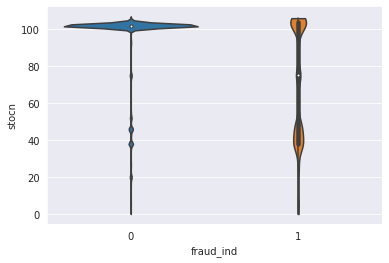

In [0]:
sns.set_style('darkgrid')
sns.violinplot(x='fraud_ind' ,y='stocn' ,cut=0 ,data=train_df)

In [0]:
#消費城市
all_df['scity_g']=np.nan

for i in range (0,len(all_df['scity'])):
    if all_df['scity'][i]<500:
        all_df['scity_g'][i]='0'
    elif 500<=all_df['scity'][i]<3000:
        all_df['scity_g'][i]='1'
    elif 3000<=all_df['scity'][i]<5000:
        all_df['scity_g'][i]='2'
    else:
        all_df['scity_g'][i]='3'

#all_df.groupby('scity_g')['fraud_ind'].count()
pd.crosstab(all_df.scity_g, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
scity_g,,,
0.0,164696,1439,166135
1.0,69387,4442,73829
2.0,198281,4235,202516
3.0,1069068,10239,1079307
Total,1501432,20355,1521787


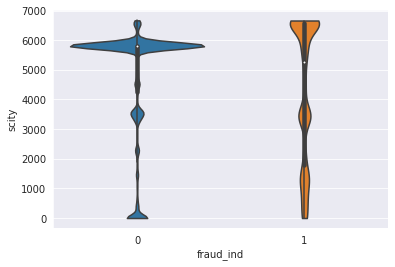

In [0]:
sns.set_style('darkgrid')
sns.violinplot(x='fraud_ind' ,y='scity' ,cut=0 ,data=train_df)

In [0]:
#特店代號
all_df['mchno_g']=np.nan

for i in range (0,len(all_df['mchno'])):
    if all_df['mchno'][i]<25000:
        all_df['mchno_g'][i]='0'
    elif 25000<=all_df['mchno'][i]<60000:
        all_df['mchno_g'][i]='1'
    elif 60000<=all_df['mchno'][i]<90000:
        all_df['mchno_g'][i]='2'
    else:
        all_df['mchno_g'][i]='3'

#all_df.groupby('mchno_g')['fraud_ind'].count()
pd.crosstab(all_df.mchno_g, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
mchno_g,,,
0.0,341999,2442,344441
1.0,431574,13039,444613
2.0,506431,4371,510802
3.0,221428,503,221931
Total,1501432,20355,1521787


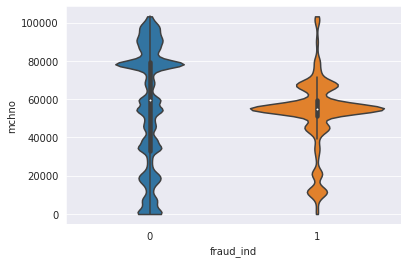

In [0]:
sns.set_style('darkgrid')
sns.violinplot(x='fraud_ind' ,y='mchno' ,cut=0 ,data=train_df)

In [0]:
#MCC_CODE
all_df['mcc_g']=np.nan

for i in range (0,len(all_df['mcc'])):
    if all_df['mcc'][i]<150:
        all_df['mcc_g'][i]='0'
    elif 150<=all_df['mcc'][i]<220:
        all_df['mcc_g'][i]='1'
    elif 220<=all_df['mcc'][i]<320:
        all_df['mcc_g'][i]='2'
    elif 220<=all_df['mcc'][i]<400:
        all_df['mcc_g'][i]='3'
    else:
        all_df['mcc_g'][i]='4'

#all_df.groupby('mcc_g')['fraud_ind'].count()
pd.crosstab(all_df.mcc_g, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
mcc_g,,,
0.0,7819,137,7956
1.0,142855,3712,146567
2.0,917911,9972,927883
3.0,208280,5611,213891
4.0,224567,923,225490
Total,1501432,20355,1521787


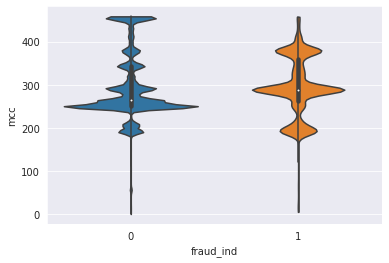

In [0]:
sns.set_style('darkgrid')
sns.violinplot(x='fraud_ind' ,y='mcc' ,cut=0 ,data=train_df)

In [0]:
#授權日期
all_df['locdt_g']=np.nan

for i in range (0,len(all_df['locdt'])):
    if all_df['locdt'][i]<20:
        all_df['locdt_g'][i]='0'
    elif 20<=all_df['locdt'][i]<60:
        all_df['locdt_g'][i]='1'
    else:
        all_df['locdt_g'][i]='2'

#all_df.groupby('locdt_g')['fraud_ind'].count()
pd.crosstab(all_df.locdt_g, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
locdt_g,,,
0.0,321669,3803,325472
1.0,660631,11214,671845
2.0,519132,5338,524470
Total,1501432,20355,1521787


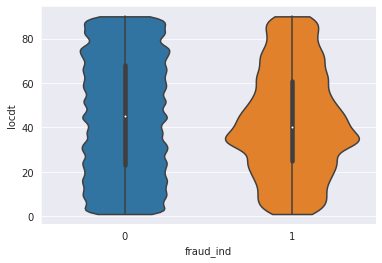

In [0]:
sns.set_style('darkgrid')
sns.violinplot(x='fraud_ind' ,y='locdt' ,cut=0 ,data=train_df)

In [0]:
#分期期數
all_df['iterm_g']=np.nan

for i in range (0,len(all_df['iterm'])):
    if all_df['iterm'][i]<1:
        all_df['iterm_g'][i]='0'
    elif 1<=all_df['iterm'][i]<4:
        all_df['iterm_g'][i]='1'
    else:
        all_df['iterm_g'][i]='2'

#all_df.groupby('iterm_g')['fraud_ind'].count()
pd.crosstab(all_df.iterm_g, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
iterm_g,,,
0.0,1459180,20318,1479498
1.0,38047,36,38083
2.0,4205,1,4206
Total,1501432,20355,1521787


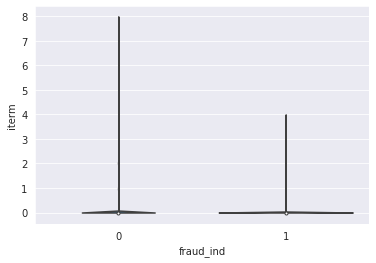

In [0]:
sns.set_style('darkgrid')
sns.violinplot(x='fraud_ind' ,y='iterm' ,cut=0 ,data=train_df)

In [0]:
#支付形態：類別型態
#all_df.groupby('hcefg')['fraud_ind'].count()
pd.crosstab(all_df.hcefg, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
hcefg,,,
0,53904,21,53925
1,33029,26,33055
2,3365,0,3365
3,313,0,313
5,1391930,20109,1412039
6,12386,195,12581
7,1784,4,1788
8,3820,0,3820
9,901,0,901


In [0]:
#交易型態：類別型態
#all_df.groupby('etymd')['fraud_ind'].count()
pd.crosstab(all_df.etymd, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
etymd,,,
0,129839,183,130022
1,10316,23,10339
2,369865,7804,377669
3,2333,17,2350
4,320327,175,320502
5,404408,203,404611
6,1833,145,1978
7,161,67,228
8,232427,11568,243995


In [0]:
#消費地幣別
all_df['csmcu_g']=np.nan

for i in range (0,len(all_df['csmcu'])):
    if all_df['csmcu'][i]<5:
        all_df['csmcu_g'][i]='0'
    elif 5<=all_df['csmcu'][i]<15:
        all_df['csmcu_g'][i]='1'
    elif 15<=all_df['csmcu'][i]<50:
        all_df['csmcu_g'][i]='2'
    else:
        all_df['csmcu_g'][i]='3'

#all_df.groupby('csmcu_g')['fraud_ind'].count()
pd.crosstab(all_df.csmcu_g, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
csmcu_g,,,
0.0,177210,723,177933
1.0,18134,655,18789
2.0,17848,1128,18976
3.0,1288240,17849,1306089
Total,1501432,20355,1521787


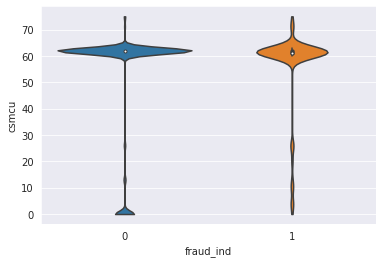

In [0]:
sns.set_style('darkgrid')
sns.violinplot(x='fraud_ind' ,y='csmcu' ,cut=0 ,data=train_df)

In [0]:
#交易類別：類別型態
#all_df.groupby('contp')['fraud_ind'].count()
pd.crosstab(all_df.contp, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
contp,,,
0,44,0,44
1,84,0,84
2,66139,8,66147
3,2134,14,2148
4,69188,777,69965
5,1350253,19553,1369806
6,13590,3,13593
Total,1501432,20355,1521787


In [0]:
#交易金額-台幣
all_df['conam_g']=np.nan

for i in range (0,len(all_df['conam'])):
    if all_df['conam'][i]< 250:
        all_df['conam_g'][i]='0'
    elif 250 <= all_df['conam'][i]< 700:
        all_df['conam_g'][i]='1'
    elif  700 <= all_df['conam'][i] < 1500:
        all_df['conam_g'][i]='2'
    else:
        all_df['conam_g'][i]='3'

#all_df.groupby('conam_g')['fraud_ind'].count()
pd.crosstab(all_df.conam_g, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
conam_g,,,
0.0,174993,5344,180337
1.0,784981,4946,789927
2.0,481829,8179,490008
3.0,59629,1886,61515
Total,1501432,20355,1521787


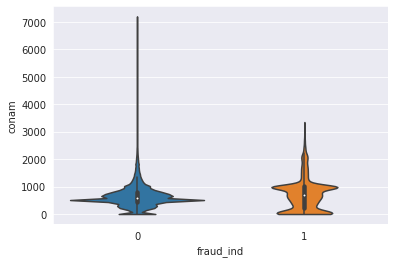

In [0]:
sns.set_style('darkgrid')
sns.violinplot(x='fraud_ind' ,y='conam' ,cut=0 ,data=train_df)

In [0]:
#收單行代碼
all_df['acqic_g']=np.nan

for i in range (0,len(all_df['acqic'])):
    if all_df['acqic'][i]< 2000:
        all_df['acqic_g'][i]='0'
    elif  2000 <= all_df['acqic'][i] < 5000:
        all_df['acqic_g'][i]='1'
    else:
        all_df['acqic_g'][i]='2'

#all_df.groupby('acqic_g')['fraud_ind'].count()
pd.crosstab(all_df.acqic_g, all_df.fraud_ind, margins=True, margins_name="Total")

fraud_ind,0.0,1.0,Total
acqic_g,,,
0.0,63246,117,63363
1.0,98329,9049,107378
2.0,1339857,11189,1351046
Total,1501432,20355,1521787


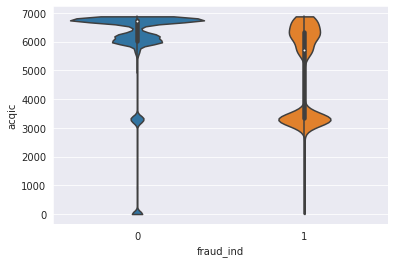

In [0]:
sns.set_style('darkgrid')
sns.violinplot(x='fraud_ind' ,y='acqic' ,cut=0 ,data=train_df)

In [0]:
all_df.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,txkey_g,stocn_g,scity_g,mchno_g,mcc_g,locdt_g,iterm_g,csmcu_g,conam_g,acqic_g
0,6881,113261,38038,513.80,5,0,N,0,N,N,0.0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056,1.0,3.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,2.0
1,0,134508,45725,465.62,5,0,N,2,N,N,0.0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376,0.0,3.0,3.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
2,6881,15408,188328,513.80,5,0,N,0,N,N,0.0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434,0.0,3.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,2.0
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0.0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164,2.0,3.0,2.0,1.0,2.0,0.0,0.0,3.0,2.0,2.0
4,5975,105985,81305,713.66,5,62,N,4,N,N,0.0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004,2.0,3.0,3.0,3.0,2.0,0.0,0.0,3.0,2.0,2.0


In [0]:
all_df[all_df['fraud_ind'].notnull()]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,txkey_g,stocn_g,scity_g,mchno_g,mcc_g,locdt_g,iterm_g,csmcu_g,conam_g,acqic_g
0,6881,113261,38038,513.80,5,0,N,0,N,N,0.0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056,1.0,3.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,2.0
1,0,134508,45725,465.62,5,0,N,2,N,N,0.0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376,0.0,3.0,3.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
2,6881,15408,188328,513.80,5,0,N,0,N,N,0.0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434,0.0,3.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,2.0
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0.0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164,2.0,3.0,2.0,1.0,2.0,0.0,0.0,3.0,2.0,2.0
4,5975,105985,81305,713.66,5,62,N,4,N,N,0.0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004,2.0,3.0,3.0,3.0,2.0,0.0,0.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,5,75,Y,8,NaN,NaN,0.0,6,N,0,4,191642.0,209,38222,N,5817,102,0,1478280,2.0,3.0,3.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0
1521783,3226,145107,116252,435.32,5,75,Y,8,NaN,NaN,0.0,6,N,0,13,102338.0,192,90135,N,1458,102,0,661087,1.0,3.0,1.0,3.0,1.0,0.0,0.0,3.0,1.0,1.0
1521784,6769,162168,93598,1.38,5,75,Y,8,NaN,NaN,0.0,6,N,0,29,234618.0,373,79246,N,5817,102,0,167073,0.0,3.0,3.0,2.0,3.0,1.0,0.0,3.0,0.0,2.0
1521785,6032,45406,197460,1.38,5,75,Y,2,NaN,NaN,0.0,6,N,0,24,215218.0,373,79246,N,5817,102,0,338215,0.0,3.0,3.0,2.0,3.0,1.0,0.0,3.0,0.0,2.0


In [0]:
all_df[np.isnan(all_df['fraud_ind'])]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,txkey_g,stocn_g,scity_g,mchno_g,mcc_g,locdt_g,iterm_g,csmcu_g,conam_g,acqic_g
1521787,6881,163188,116799,513.80,5,0,N,0,N,N,NaN,5,N,0,102,215328.0,457,59360,N,0,102,0,592489,1.0,3.0,0.0,1.0,4.0,2.0,0.0,0.0,1.0,2.0
1521788,6881,163188,116799,513.80,5,0,N,0,N,N,NaN,5,N,0,102,222007.0,457,59360,N,0,102,0,592452,1.0,3.0,0.0,1.0,4.0,2.0,0.0,0.0,1.0,2.0
1521789,6881,163188,116799,513.80,5,0,N,0,N,N,NaN,5,N,0,100,170013.0,457,59360,N,0,102,0,590212,1.0,3.0,0.0,1.0,4.0,2.0,0.0,0.0,1.0,2.0
1521790,6881,163188,116799,513.80,5,0,N,0,N,N,NaN,5,N,0,100,165914.0,457,59360,N,0,102,0,590209,1.0,3.0,0.0,1.0,4.0,2.0,0.0,0.0,1.0,2.0
1521791,6881,163188,116799,513.80,5,0,N,0,N,N,NaN,5,N,0,102,215311.0,457,59360,N,0,102,0,592488,1.0,3.0,0.0,1.0,4.0,2.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943447,5975,147326,79511,633.76,5,62,N,2,N,N,NaN,5,N,0,116,111228.0,343,87282,N,5817,102,0,1187507,2.0,3.0,3.0,2.0,3.0,2.0,0.0,3.0,1.0,2.0
1943448,6716,14305,136493,952.84,5,62,N,5,N,N,NaN,8,N,0,107,85839.0,245,48784,N,5859,102,0,1182598,2.0,3.0,3.0,1.0,2.0,2.0,0.0,3.0,2.0,2.0
1943449,5975,156543,137963,713.42,5,62,N,4,N,N,NaN,5,N,0,111,184921.0,263,98326,N,5817,102,0,898724,1.0,3.0,3.0,3.0,2.0,2.0,0.0,3.0,2.0,2.0
1943450,6231,156543,137964,903.94,5,62,N,5,N,N,NaN,5,N,0,114,144434.0,251,17763,N,5817,102,0,971467,1.0,3.0,3.0,0.0,2.0,2.0,0.0,3.0,2.0,2.0


In [0]:
#一起處理變數(分組)，分開儲存
all_df.to_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/all_new.csv')
all_df[all_df['fraud_ind'].notnull()].to_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/train_new.csv')
all_df[np.isnan(all_df['fraud_ind'])].to_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/test_new.csv')

In [0]:
all_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/all_new.csv')
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/train_new.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/test_new.csv')

In [0]:
#沒有交易序號和類別型態的變數
dummies_num_list = ['stocn_g','scity_g','mchno_g','mcc_g','locdt_g','iterm_g','csmcu_g','conam_g','acqic_g'] 
my_dummies_num_df = all_df[dummies_num_list]
dummies_num_df = pd.DataFrame()
for name in dummies_num_list:
    print(name)
    dummies = pd.get_dummies(my_dummies_num_df[name], drop_first=False)
    dummies = dummies.add_prefix('{}_'.format(name))
    dummies_num_df = pd.concat([dummies_num_df,dummies],axis=1) #concat是把兩個表並在一起
dummies_num_df.head()

stocn_g
scity_g
mchno_g
mcc_g
locdt_g
iterm_g
csmcu_g
conam_g
acqic_g


,stocn_g_0.0,stocn_g_1.0,stocn_g_2.0,stocn_g_3.0,scity_g_0.0,scity_g_1.0,scity_g_2.0,scity_g_3.0,mchno_g_0.0,mchno_g_1.0,mchno_g_2.0,mchno_g_3.0,mcc_g_0.0,mcc_g_1.0,mcc_g_2.0,mcc_g_3.0,mcc_g_4.0,locdt_g_0.0,locdt_g_1.0,locdt_g_2.0,iterm_g_0.0,iterm_g_1.0,iterm_g_2.0,csmcu_g_0.0,csmcu_g_1.0,csmcu_g_2.0,csmcu_g_3.0,conam_g_0.0,conam_g_1.0,conam_g_2.0,conam_g_3.0,acqic_g_0.0,acqic_g_1.0,acqic_g_2.0
0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1


In [0]:
y_series = all_df.fraud_ind
txkey_series = all_df.txkey

print(dummies_num_df.shape)
print(y_series.shape)
print(txkey_series.shape)

(1943452, 34)
(1943452,)
(1943452,)


* 類別型態變數(參考網路)

In [0]:
dummies_cate_list = ['contp' ,'etymd' ,'hcefg' ,'stscd'] 
my_dummies_cate_df = all_df[dummies_cate_list]
dummies_cate_df = pd.DataFrame()
for name in dummies_cate_list:
    print(name)
    dummies = pd.get_dummies(my_dummies_cate_df[name], drop_first=False)
    dummies = dummies.add_prefix('{}_'.format(name))
    dummies_cate_df = pd.concat([dummies_cate_df,dummies],axis=1) #concat是把兩個表並在一起
dummies_cate_df.head()

contp
etymd
hcefg
stscd


,contp_0,contp_1,contp_2,contp_3,contp_4,contp_5,contp_6,etymd_0,etymd_1,etymd_2,etymd_3,etymd_4,etymd_5,etymd_6,etymd_7,etymd_8,etymd_9,etymd_10,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_4,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


* 類別變數(參考網路)


In [0]:
categorical_features = all_df.select_dtypes(include='object')
categorical_features.head()

,ecfg,flbmk,flg_3dsmk,insfg,ovrlt
0,N,N,N,N,N
1,N,N,N,N,N
2,N,N,N,N,N
3,N,N,N,N,N
4,N,N,N,N,N


In [0]:
categorical_features['null'] = categorical_features['flbmk'].isnull()

In [0]:
categorical_features = categorical_features.fillna(0)

In [0]:
categorical_features = categorical_features.replace(['Y', 'N'], [2, 1])

In [0]:
dummies_list_cate = ['ecfg','flbmk' ,'insfg' ,'ovrlt'] 
my_dummies_df_cate = categorical_features[dummies_list_cate]
dummies_df_cate = pd.DataFrame()
# # object_features = categorical_features.select_dtypes(include='object').columns
for name in dummies_list_cate:
    print(name)
    dummies = pd.get_dummies(my_dummies_df_cate[name], drop_first=False)
    dummies = dummies.add_prefix('{}_'.format(name))
    dummies_df_cate = pd.concat([dummies_df_cate,dummies],axis=1) #concat是把兩個表並在一起
dummies_df_cate.head()

ecfg
flbmk
insfg
ovrlt


,ecfg_1,ecfg_2,flbmk_0,flbmk_1,flbmk_2,insfg_1,insfg_2,ovrlt_1,ovrlt_2
0,1,0,0,1,0,1,0,1,0
1,1,0,0,1,0,1,0,1,0
2,1,0,0,1,0,1,0,1,0
3,1,0,0,1,0,1,0,1,0
4,1,0,0,1,0,1,0,1,0


In [0]:
dummies_num_list_skip = ['acqic_g' ,'conam_g' ,'csmcu_g','iterm_g','locdt_g','mcc_g','mchno_g','scity_g','stocn_g'] 
dummies_num_list_skip_ng =[]# ['acqic' ,'conam' ,'csmcu','iterm','locdt','mcc','mchno','scity','stocn'] 
dummies_list_cate_skip = ['ecfg' ,'flbmk' ,'insfg' ,'ovrlt'] 
dummies_cate_list_skip = ['contp' ,'etymd' ,'hcefg' ,'stscd','flg_3dsmk']
dummies_list = set(all_df.columns).difference(set(dummies_num_list_skip))
dummies_list = set(dummies_list).difference(set(dummies_num_list_skip_ng))
dummies_list = set(dummies_list).difference(set(dummies_list_cate_skip)) 
dummies_list = set(dummies_list).difference(set(dummies_cate_list_skip))
dummies_list = set(dummies_list).difference(set(['Unnamed: 0','fraud_ind','txkey','txkey_g']))
dummies_list

{'acqic',
 'bacno',
 'cano',
 'conam',
 'csmcu',
 'iterm',
 'locdt',
 'loctm',
 'mcc',
 'mchno',
 'scity',
 'stocn'}

In [0]:
my_dummies_df_val = all_df[dummies_list]
my_dummies_df_val.head()

,stocn,iterm,mcc,scity,mchno,bacno,acqic,csmcu,loctm,cano,conam,locdt
0,102,0,457,0,59333,113261,6881,0,172652.0,38038,513.80,33
1,102,0,451,5817,0,134508,0,0,105114.0,45725,465.62,9
2,102,0,457,0,59333,15408,6881,0,152458.0,188328,513.80,6
3,102,0,247,3281,50436,157159,6716,62,172946.0,29967,1016.11,5
4,102,0,263,5817,93775,105985,5975,62,182129.0,81305,713.66,6


In [0]:
scaler = StandardScaler()

dummies_df_arr = scaler.fit_transform(my_dummies_df_val)

dummies_df_st = pd.DataFrame(data=dummies_df_arr, index=my_dummies_df_val.index, columns=my_dummies_df_val.columns)

dummies_df_st.head()

,stocn,iterm,mcc,scity,mchno,bacno,acqic,csmcu,loctm,cano,conam,locdt
0,0.336256,-0.133894,2.028863,-2.398364,0.111604,0.658734,0.582079,-2.590131,0.509681,-1.162081,-0.341794,-0.744762
1,0.336256,-0.133894,1.952344,0.536031,-1.812952,1.107708,-3.987783,-2.590131,-0.782179,-1.036278,-0.461282,-1.448673
2,0.336256,-0.133894,2.028863,-2.398364,0.111604,-1.409013,0.582079,-2.590131,0.123412,1.297514,-0.341794,-1.536662
3,0.336256,-0.133894,-0.649316,-0.743258,-0.176983,1.586350,0.472498,0.395402,0.515305,-1.294169,0.903959,-1.565992
4,0.336256,-0.133894,-0.445264,0.536031,1.228783,0.504984,-0.019621,0.395402,0.690956,-0.453988,0.153869,-1.536662


In [0]:
dummies_df = pd.concat([dummies_cate_df, dummies_df_cate, dummies_df_st],axis=1) #, dummies_num_df
dummies_df.columns

Index(['contp_0', 'contp_1', 'contp_2', 'contp_3', 'contp_4', 'contp_5',
       'contp_6', 'etymd_0', 'etymd_1', 'etymd_2', 'etymd_3', 'etymd_4',
       'etymd_5', 'etymd_6', 'etymd_7', 'etymd_8', 'etymd_9', 'etymd_10',
       'hcefg_0', 'hcefg_1', 'hcefg_2', 'hcefg_3', 'hcefg_4', 'hcefg_5',
       'hcefg_6', 'hcefg_7', 'hcefg_8', 'hcefg_9', 'stscd_0', 'stscd_1',
       'stscd_2', 'stscd_3', 'stscd_4', 'ecfg_1', 'ecfg_2', 'flbmk_0',
       'flbmk_1', 'flbmk_2', 'insfg_1', 'insfg_2', 'ovrlt_1', 'ovrlt_2',
       'stocn', 'iterm', 'mcc', 'scity', 'mchno', 'bacno', 'acqic', 'csmcu',
       'loctm', 'cano', 'conam', 'locdt'],
      dtype='object')

In [0]:
dummies_df['txkey'] = txkey_series
dummies_df['fraud_ind'] = y_series
print(dummies_df.shape)

(1943452, 56)


In [0]:
dummies_df.head()

,contp_0,contp_1,contp_2,contp_3,contp_4,contp_5,contp_6,etymd_0,etymd_1,etymd_2,etymd_3,etymd_4,etymd_5,etymd_6,etymd_7,etymd_8,etymd_9,etymd_10,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_4,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,ecfg_1,ecfg_2,flbmk_0,flbmk_1,flbmk_2,insfg_1,insfg_2,ovrlt_1,ovrlt_2,stocn,iterm,mcc,scity,mchno,bacno,acqic,csmcu,loctm,cano,conam,locdt,txkey,fraud_ind
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0.336256,-0.133894,2.028863,-2.398364,0.111604,0.658734,0.582079,-2.590131,0.509681,-1.162081,-0.341794,-0.744762,516056,0.0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0.336256,-0.133894,1.952344,0.536031,-1.812952,1.107708,-3.987783,-2.590131,-0.782179,-1.036278,-0.461282,-1.448673,4376,0.0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0.336256,-0.133894,2.028863,-2.398364,0.111604,-1.409013,0.582079,-2.590131,0.123412,1.297514,-0.341794,-1.536662,483434,0.0
3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0.336256,-0.133894,-0.649316,-0.743258,-0.176983,1.586350,0.472498,0.395402,0.515305,-1.294169,0.903959,-1.565992,1407164,0.0
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0.336256,-0.133894,-0.445264,0.536031,1.228783,0.504984,-0.019621,0.395402,0.690956,-0.453988,0.153869,-1.536662,1051004,0.0


In [0]:
#一起處理變數，分開儲存
dummies_df.to_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/all_new_dummy.csv')
dummies_df[dummies_df['fraud_ind'].notnull()].to_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/train_new_dummy.csv')
dummies_df[np.isnan(dummies_df['fraud_ind'])].to_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/test_new_dummy.csv')

In [0]:
final_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/all_new_dummy.csv')
final_train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/train_new_dummy.csv')
final_test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/test_new_dummy.csv')

In [0]:
train_df_f = final_train_df
test_df_f = final_test_df
train_df_f

,Unnamed: 0,contp_0,contp_1,contp_2,contp_3,contp_4,contp_5,contp_6,etymd_0,etymd_1,etymd_2,etymd_3,etymd_4,etymd_5,etymd_6,etymd_7,etymd_8,etymd_9,etymd_10,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_4,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,ecfg_1,ecfg_2,flbmk_0,flbmk_1,flbmk_2,insfg_1,insfg_2,ovrlt_1,ovrlt_2,stocn,iterm,mcc,scity,mchno,bacno,acqic,csmcu,loctm,cano,conam,locdt,txkey,fraud_ind
0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0.336256,-0.133894,2.028863,-2.398364,0.111604,0.658734,0.582079,-2.590131,0.509681,-1.162081,-0.341794,-0.744762,516056,0.0
1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0.336256,-0.133894,1.952344,0.536031,-1.812952,1.107708,-3.987783,-2.590131,-0.782179,-1.036278,-0.461282,-1.448673,4376,0.0
2,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0.336256,-0.133894,2.028863,-2.398364,0.111604,-1.409013,0.582079,-2.590131,0.123412,1.297514,-0.341794,-1.536662,483434,0.0
3,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0.336256,-0.133894,-0.649316,-0.743258,-0.176983,1.586350,0.472498,0.395402,0.515305,-1.294169,0.903959,-1.565992,1407164,0.0
4,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0.336256,-0.133894,-0.445264,0.536031,1.228783,0.504984,-0.019621,0.395402,0.690956,-0.453988,0.153869,-1.536662,1051004,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,1521782,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0.336256,-0.133894,-1.133939,0.536031,-0.573163,0.188502,0.210832,1.021401,0.872920,-1.536020,-0.181632,-1.595321,1478280,0.0
1521783,1521783,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0.336256,-0.133894,-1.350744,-1.662873,1.110714,1.331677,-1.845307,1.021401,-0.835278,0.117943,-0.536428,-1.331355,661087,0.0
1521784,1521784,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0.336256,-0.133894,0.957592,0.536031,0.757513,1.692196,0.507697,1.021401,1.694960,-0.252805,-1.612619,-0.862080,167073,0.0
1521785,1521785,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0.336256,-0.133894,0.957592,0.536031,0.757513,-0.775121,0.018235,1.021401,1.323879,1.446966,-1.612619,-1.008729,338215,0.0


In [0]:
train_df_f[train_df_f['fraud_ind'] == 1].shape[0]/train_df_f[train_df_f['fraud_ind'] == 0].shape[0]

0.013557057529078907

In [0]:
#train_df_f.columns
X = train_df_f.drop(labels=['Unnamed: 0','fraud_ind','txkey'],axis=1)
print(X.shape)
y = train_df_f['fraud_ind']
print(y.shape)

(1521787, 54)
(1521787,)


#### Split the dataset

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=220)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(len(y_test[y_test==1]))

(1217429, 54)
(304358, 54)
4078


In [0]:
# 分類放置my_X
my_X_1 = X_train[y_train == 1]
my_X_0 = X_train[y_train == 0].sample(n=int(sum(y_train)*25), random_state=82041)
my_X = pd.concat([my_X_0, my_X_1], axis=0)

In [0]:
from sklearn.utils import shuffle
# 打亂my_X原本的順序
my_X = shuffle(my_X)

建立模型

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix

In [0]:
def get_f1_score(confusion_matrix, i):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    for j in range(len(confusion_matrix)):
        if (i == j):
            # true positive: 真實為i，預測為i (confusion matrix 中的對角線項目)
            TP += confusion_matrix[i, j]
            tmp = np.delete(confusion_matrix, i, 0)
            tmp = np.delete(tmp, j, 1)
            # true negative: 真實不為i, 預測不為i (confusion matrix 中, row=col=i 以外的項目總合)
            TN += np.sum(tmp)
        else:
            if (confusion_matrix[i, j] != 0):
                # false negative: 真實為i, 預測不為i (confusion matrix中, row i 上不為0的總數)
                FN += confusion_matrix[i, j]
            if (confusion_matrix[j, i] != 0):
                # false positive: 真實不為i, 預測為i (confusion matrix中, col i 上不為0的總數)
                FP += confusion_matrix[j, i]

    recall = TP / (FN + TP)
    precision = TP / (TP + FP)
    f1_score = 2 * 1/(1/recall + 1/precision)
    
    return f1_score

#### Random forest

In [0]:
t1 = datetime.datetime.now()

In [0]:
#In mid2_06.ipynb
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=500,
                             min_samples_split=15,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=82041,
                             n_jobs=-1) 

rf.fit(X_train, y_train)
print("%.4f" % rf.oob_score_)

0.9931


In [0]:
t2 = datetime.datetime.now()
print((t2-t1).seconds)

1072


In [0]:
y_pred = rf.predict(X_test)

In [0]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[300011,    269],
       [  1787,   2291]])

In [0]:
get_f1_score(conf_mat,1)

0.69026815305815

In [0]:
y_pred.sum()/len(y_pred)

0.008411147398786956

In [0]:
x_submit = test_df_f.drop(labels=['Unnamed: 0','fraud_ind','txkey'],axis=1)
#x_submit.shape
pred = rf.predict(x_submit)

In [0]:
submit = pd.DataFrame({"txkey": test_df_f['txkey'],
                      "fraud_ind":pred.astype(int)})
submit

,txkey,fraud_ind
0,592489,0
1,592452,0
2,590212,0
3,590209,0
4,592488,0
...,...,...
421660,1187507,0
421661,1182598,0
421662,898724,0
421663,971467,0


In [0]:
#In mid2_06.ipynb
submit.to_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/submission001.csv')

In [0]:
submit["fraud_ind"].sum()/submit["fraud_ind"].shape[0]

0.006384214957371373

#### Xgboost

In [0]:
warnings.filterwarnings('ignore')
'''
parameters= {'n_estimators':[10], 'learning_rate':[0.1,0.05], 'max_depth':[12],\
             "gamma":[0, 0.1], "scale_pos_weight": [1, 2, 5]}
'''
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(5,20), # 樹有幾棵
    'max_depth': range(6,20), # 樹的深度
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1],
    'min_child_weight':range(1,6,2)
    }

First：XGB Classifity

In [0]:
t1 = datetime.datetime.now()

In [0]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_model.score(X_test, y_test)

0.988989939479166

In [0]:
t2 = datetime.datetime.now()
print((t2-t1).seconds)

230


In [0]:
y_pred = xgb_model.predict(X_test)

In [0]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[299917,    363],
       [  2988,   1090]])

In [0]:
get_f1_score(conf_mat,1)

0.394142108117881

In [0]:
x_submit = test_df_f.drop(labels=['Unnamed: 0','fraud_ind','txkey'],axis=1)
y_pred = xgb_model.predict(x_submit)

In [0]:
submit = pd.DataFrame({"txkey": test_df_f['txkey'],
                       "fraud_ind":y_pred.astype(int)})
submit.to_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/submission002.csv', index=False)

In [0]:
submit["fraud_ind"].sum()/submit["fraud_ind"].shape[0]

0.004854564642547994

Second：Randomized Search CV

In [0]:
t1 = datetime.datetime.now()

In [0]:
from sklearn.model_selection import RandomizedSearchCV
#from xgboost import XGBClassifier

In [0]:
xgb_best_model = RandomizedSearchCV(xgb_model, gbm_param_grid, cv=3, scoring='accuracy', return_train_score='cv_results_', verbose=1)

In [0]:
xgb_best_model.fit(X_train, y_train)
xgb_best_model.score(X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 27.9min finished


0.9938854901136162

In [0]:
# Print the best parameters and lowest RMSE
#print("Search log: ", xgb_model.grid_scores_)
print("Best parameters found: ", xgb_best_model.best_params_)
print("Best accuracy found: ", xgb_best_model.best_score_)

Best parameters found:  {'n_estimators': 17, 'min_child_weight': 1, 'max_depth': 14, 'learning_rate': 0.55, 'colsample_bytree': 0.7}
Best accuracy found:  0.9932916005779392


In [0]:
t2 = datetime.datetime.now()
print((t2-t1).seconds)

1833


In [0]:
y_pred = xgb_best_model.predict(X_test)

In [0]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[299901,    379],
       [  1482,   2596]])

In [0]:
get_f1_score(conf_mat,1)

0.7361406493690629

In [0]:
x_submit = test_df_f.drop(labels=['Unnamed: 0','fraud_ind','txkey'],axis=1)
y_pred = xgb_best_model.predict(x_submit)

In [0]:
submit = pd.DataFrame({"txkey": test_df_f['txkey'],
                      "fraud_ind":y_pred.astype(int)})
submit.to_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/submission003.csv', index=False)

In [0]:
submit["fraud_ind"].sum()/submit["fraud_ind"].shape[0]

0.007275918086632753

Third：

In [0]:
t1 = datetime.datetime.now()

In [0]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.9927125293240198

In [0]:
t2 = datetime.datetime.now()
print((t2-t1).seconds)

756


In [0]:
y_pred = xgb_best_model.predict(X_test)

In [0]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[299901,    379],
       [  1482,   2596]])

In [0]:
get_f1_score(conf_mat,1)

0.7361406493690629

In [0]:
x_submit = test_df_f.drop(labels=['Unnamed: 0','fraud_ind','txkey'],axis=1)
y_pred = xgb.predict(x_submit)

In [0]:
submit = pd.DataFrame({"txkey": test_df_f['txkey'],
                      "fraud_ind":y_pred.astype(int)})
submit.to_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/submission004.csv', index=False)

In [0]:
submit["fraud_ind"].sum()/submit["fraud_ind"].shape[0]

0.0069083277009000035

Plot

In [0]:
from xgboost import plot_importance

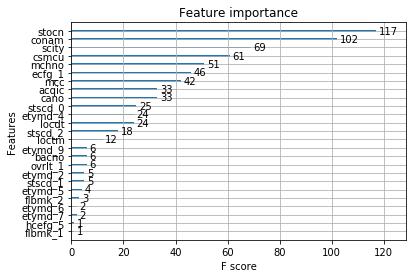

In [0]:
plot_importance(xgb_model)
#plt.figure(fig.size(20.10))
plt.show()

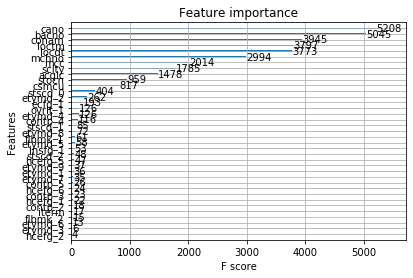

In [0]:
plot_importance(xgb)
#plt.figure(figsize(20.10))
plt.show()

#### ensemble by voting

In [0]:
my_df01 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/submission001.csv')
my_df02 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/submission002.csv')
my_df03 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/submission003.csv')
my_df04 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/競賽玉山銀行/Output/submission004.csv')

In [0]:
sum(my_df01.fraud_ind != my_df02.fraud_ind)

1175

In [0]:
sum(my_df01.fraud_ind != my_df03.fraud_ind)

1180

In [0]:
sum(my_df01.fraud_ind != my_df04.fraud_ind)

811

In [0]:
sum(my_df02.fraud_ind != my_df03.fraud_ind)

1719

In [0]:
sum(my_df02.fraud_ind != my_df04.fraud_ind)

1362

In [0]:
sum(my_df03.fraud_ind != my_df04.fraud_ind)

1241